In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("C:\\Users\\Gouri\\Downloads\\House_Pricing.csv")
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [4]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Checking for duplicate rows and columns

In [6]:
df.duplicated().sum() #no duplicated rows

0

In [7]:
dup = df.columns.duplicated()
dup
# no duplicated columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Checking for missing values and handling of missing values

In [9]:
df.isna().sum()
#There are missing values in the columns, sale price, no of bathrooms, flat area, lot area, no of times visited, area of the house from basement,
#zipcode, latitude, longitude, living area after renovation.

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [10]:
df.drop('No of Times Visited', axis=1, inplace=True)
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [11]:
numerical = df.select_dtypes(include=["number"])
numerical

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [12]:
numerical.columns.tolist()

['ID',
 'Sale Price',
 'No of Bedrooms',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Basement Area (in Sqft)',
 'Age of House (in Years)',
 'Renovated Year',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)']

In [13]:
numerical.isna().sum()

ID                                           0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [14]:
for col in numerical:
  numerical[col] = numerical[col].fillna(numerical[col].median())

numerical

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [15]:
numerical.isna().sum()
#filled all missing values in numerical column

ID                                           0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [16]:
object = df.select_dtypes(include=["object_"])
object

,Date House was Sold,Waterfront View,Condition of the House
0,14 October 2017,No,Fair
1,14 December 2017,No,Fair
2,15 February 2016,No,Fair
3,14 December 2017,No,Excellent
4,15 February 2016,No,Fair
...,...,...,...
21608,14 May 2017,No,Fair
21609,15 February 2016,No,Fair
21610,14 June 2017,No,Fair
21611,15 January 2016,No,Fair


In [17]:
object.isna().sum()

Date House was Sold       0
Waterfront View           0
Condition of the House    0
dtype: int64

In [18]:
filled = pd.concat([numerical,object], axis=1)
filled
#creating new dataframe with all missing values filled.

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Date House was Sold,Waterfront View,Condition of the House
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,14 October 2017,No,Fair
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,14 December 2017,No,Fair
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,15 February 2016,No,Fair
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,14 December 2017,No,Excellent
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,15 February 2016,No,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,14 May 2017,No,Fair
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,15 February 2016,No,Fair
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,14 June 2017,No,Fair
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,15 January 2016,No,Fair


In [19]:
filled.isna().sum()
#checking if new data has any missing values.

ID                                           0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Date House was Sold                          0
Waterfront View                              0
Condition of the House                       0
dtype: int64

## Finding outliers and removing them

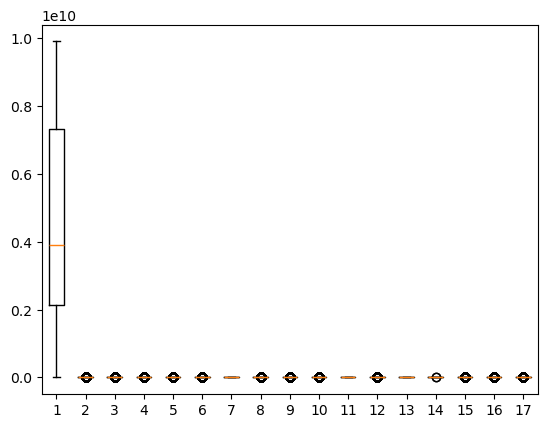

In [20]:
plt.boxplot(numerical)
plt.show()

In [40]:
def remove_outliers(numerical, column_name):
    q1 = numerical[column_name].quantile(0.25)
    q3 = numerical[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    numerical[column_name] = numerical[column_name].clip(upper=upper_bound)
    numerical[column_name] = numerical[column_name].clip(lower=lower_bound)
    return numerical[column_name]

In [46]:
for col in numerical:
  numerical[col] = remove_outliers(numerical, col)

numerical

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400,67,0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3.0,2.50,1530.0,1131.0,3.0,8.0,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,6600060120,400000.0,4.0,2.50,2310.0,5813.0,2.0,8.0,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,1523300141,402101.0,2.0,0.75,1020.0,1350.0,2.0,7.0,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,291310100,400000.0,3.0,2.50,1600.0,2388.0,2.0,8.0,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287.0


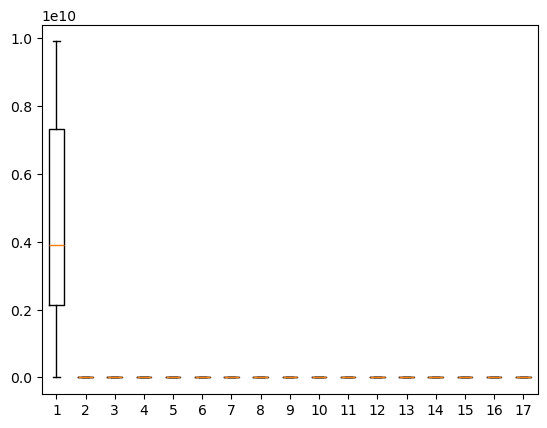

In [48]:
plt.boxplot(numerical)
plt.show()

## Scaling

In [109]:
min_max_scaler = MinMaxScaler(feature_range=(1,2))
df['flat_area_scaled'] = min_max_scaler.fit_transform(df[['Flat Area (in Sqft)']])
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,1.067170
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,1.172075
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,1.036226
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,1.126038
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,1.104906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,...,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,1.093585
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,...,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,1.152453
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,...,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,1.055094
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,...,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,1.098868


In [111]:
std_scaler = StandardScaler()
df['lot_area_scaled']= std_scaler.fit_transform(df[['Lot Area (in Sqft)']])
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,1.067170,-0.228298
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,1.172075,-0.189869
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,1.036226,-0.123294
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,1.126038,-0.243988
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,1.104906,-0.169641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,...,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,1.093585,-0.337380
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,...,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,1.152453,-0.224363
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,...,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,1.055094,-0.332094
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,...,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,1.098868,-0.307038


In [113]:
std_scaler = StandardScaler()
df['living_area_scaled']= std_scaler.fit_transform(df[['Living Area after Renovation (in Sqft)']])
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,1.067170,-0.228298,-0.943318
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,1.172075,-0.189869,-0.432658
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,1.036226,-0.123294,1.070139
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,1.126038,-0.243988,-0.914137
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,1.104906,-0.169641,-0.272165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,...,9,0,98103.0,47.6993,-122.346,1530.0,1509,1.093585,-0.337380,-0.666102
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,...,4,0,98146.0,47.5107,-122.362,1830.0,7200,1.152453,-0.224363,-0.228394
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,...,9,0,98144.0,47.5944,-122.299,1020.0,2007,1.055094,-0.332094,-1.410206
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,...,14,0,98027.0,47.5345,-122.069,1410.0,1287,1.098868,-0.307038,-0.841186


In [115]:
num = df.select_dtypes(include=['number'])
num

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,1.067170,-0.228298,-0.943318
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,1.172075,-0.189869,-0.432658
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,1.036226,-0.123294,1.070139
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,1.126038,-0.243988,-0.914137
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,1.104906,-0.169641,-0.272165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,1.093585,-0.337380,-0.666102
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,1.152453,-0.224363,-0.228394
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,1.055094,-0.332094,-1.410206
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,1.098868,-0.307038,-0.841186


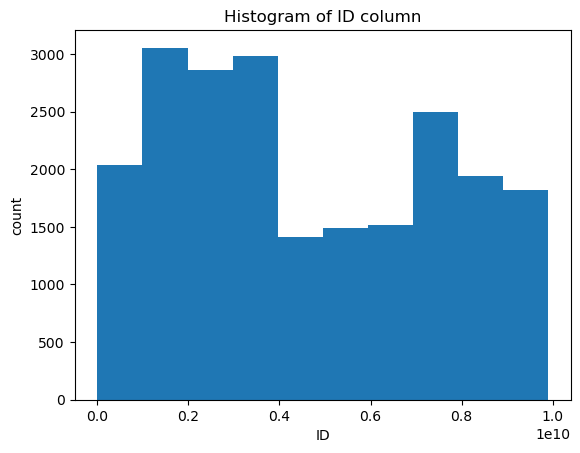

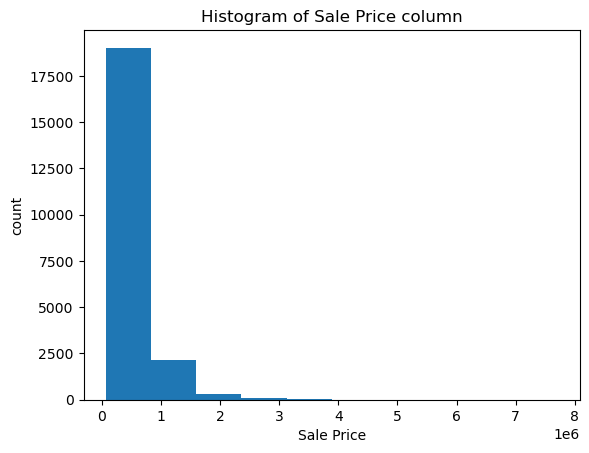

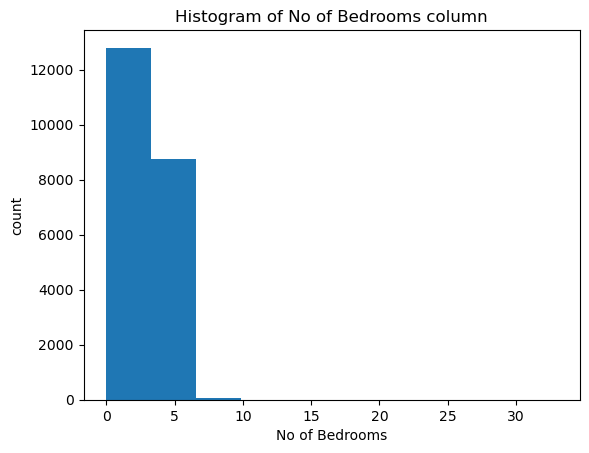

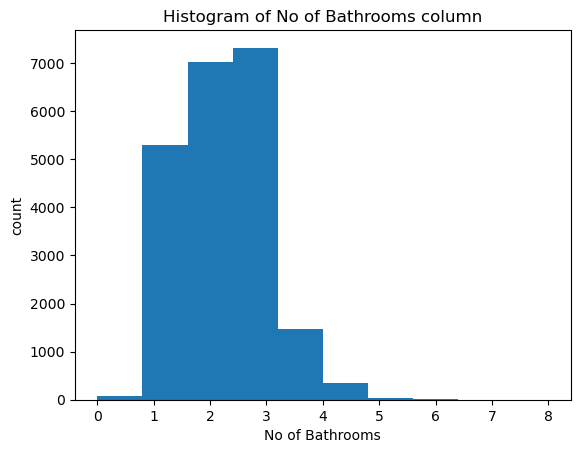

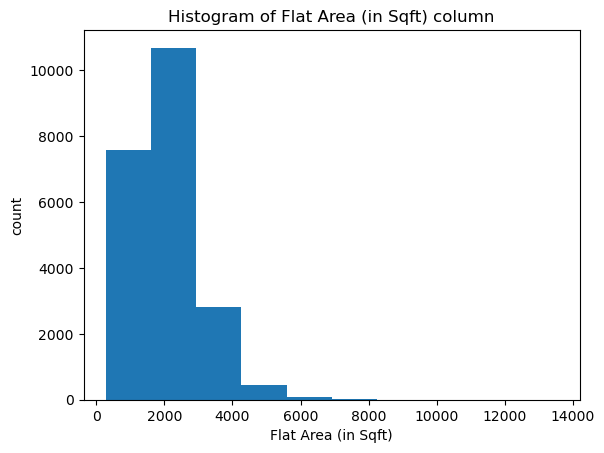

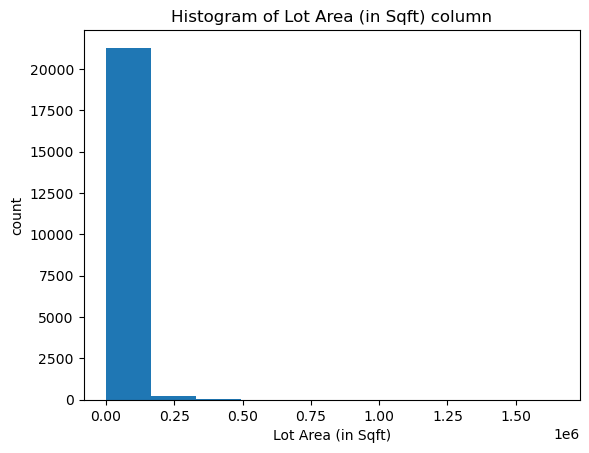

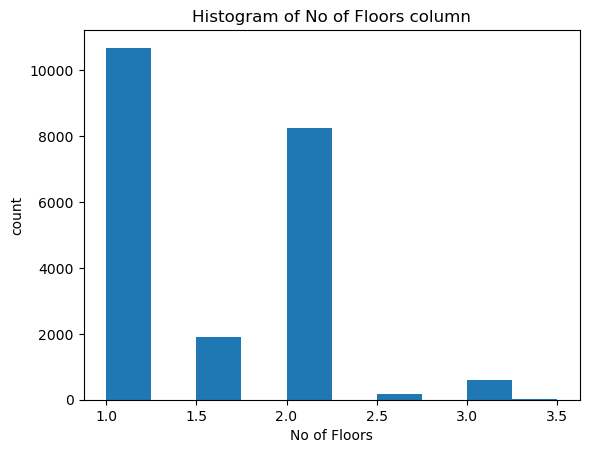

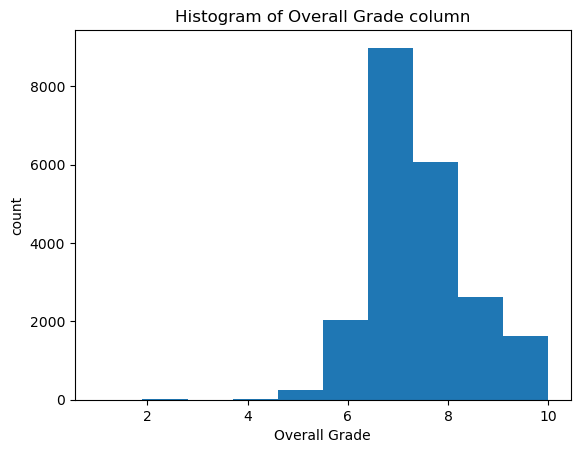

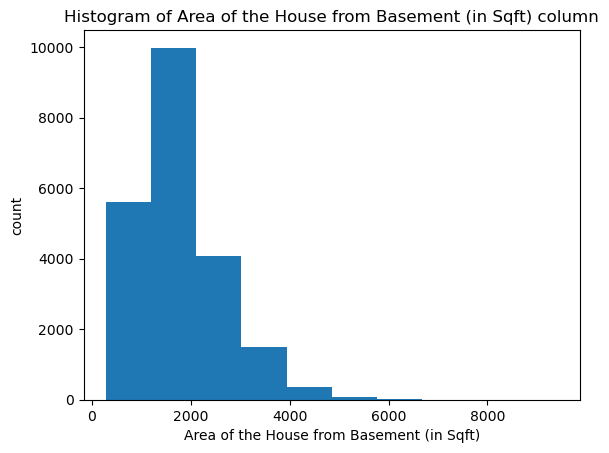

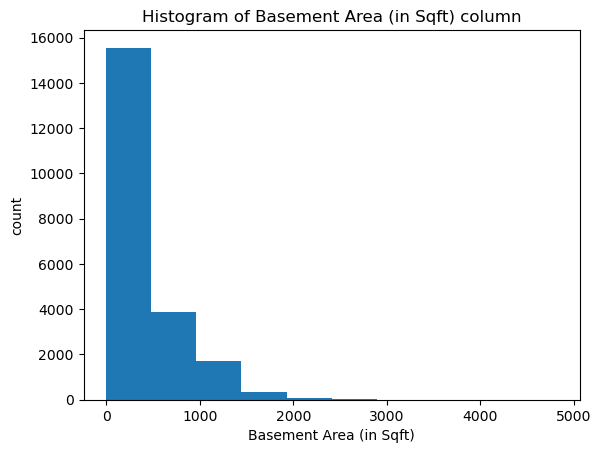

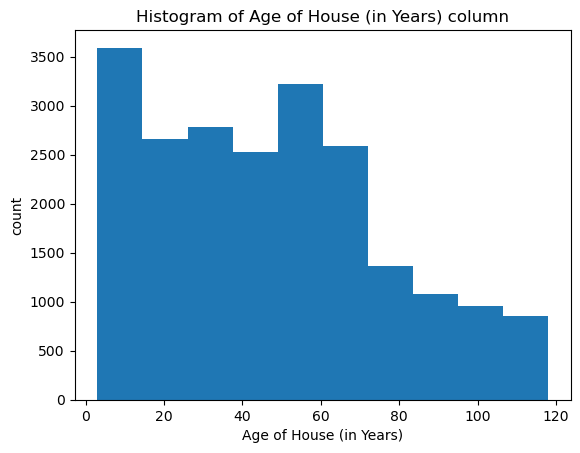

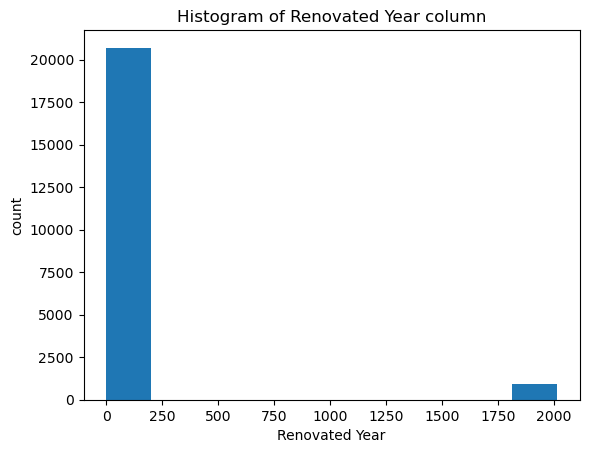

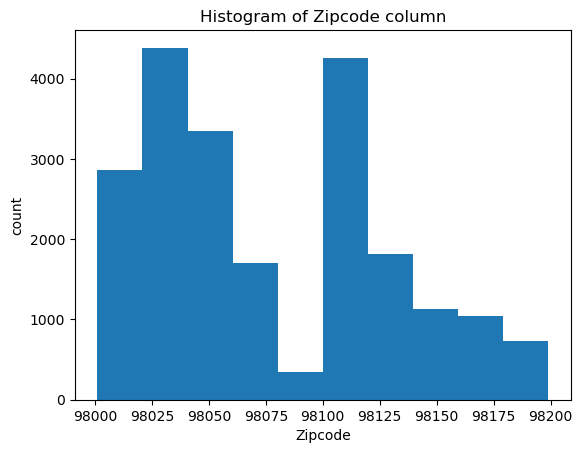

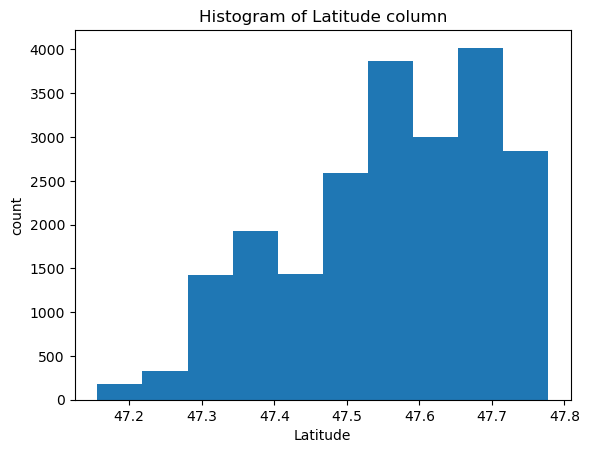

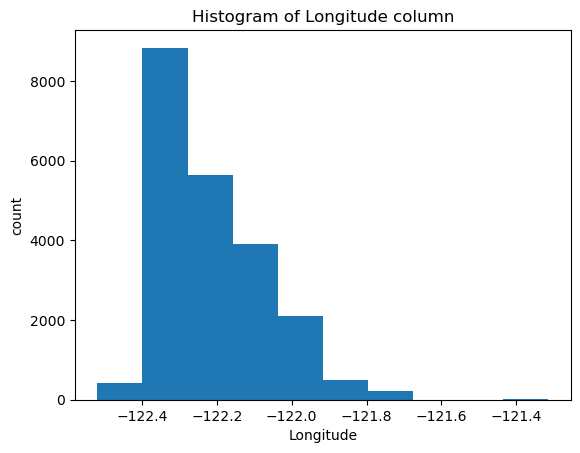

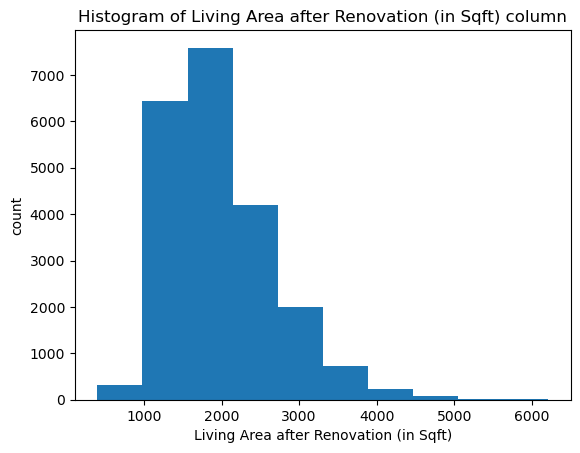

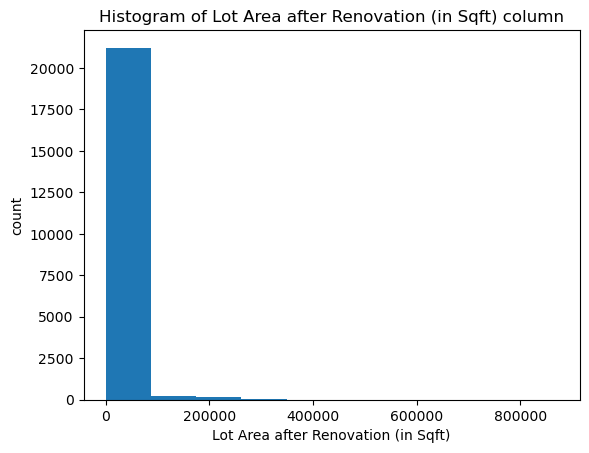

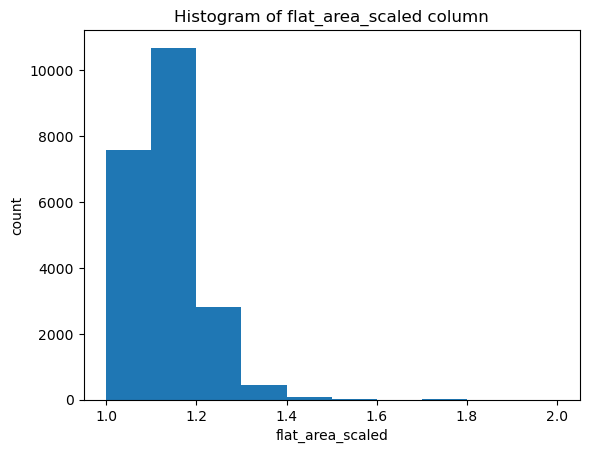

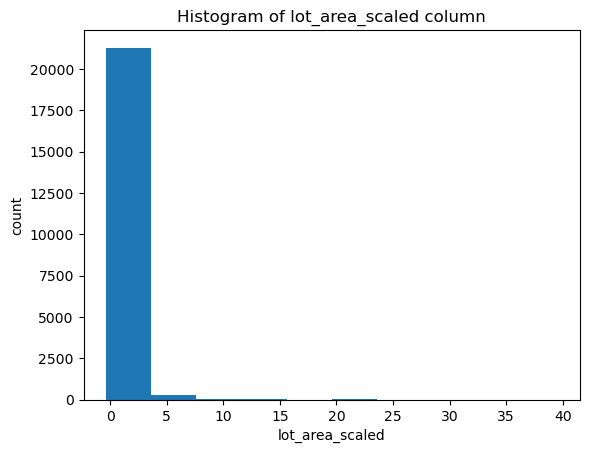

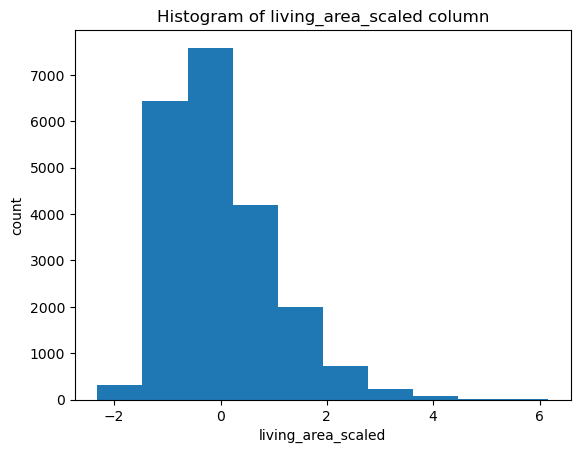

In [117]:
for c in num:
  plt.hist(num[c])
  plt.title("Histogram of {} column".format(c))
  plt.xlabel(c)
  plt.ylabel("count")
  plt.show()

In [124]:
cat = df.select_dtypes(include=["category"])
cat

""
0
1
2
3
4
...
21608
21609
21610
21611


In [136]:
label_enc = LabelEncoder()
df['View'] = label_enc.fit_transform(df['Waterfront View'])
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled,View
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,0,98178.0,47.5112,-122.257,1340.0,5650,1.067170,-0.228298,-0.943318,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,1991,98125.0,47.7210,-122.319,1690.0,7639,1.172075,-0.189869,-0.432658,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,0,98028.0,47.7379,-122.233,2720.0,8062,1.036226,-0.123294,1.070139,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,0,98136.0,47.5208,-122.393,1360.0,5000,1.126038,-0.243988,-0.914137,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,0,98074.0,47.6168,-122.045,1800.0,7503,1.104906,-0.169641,-0.272165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,...,0,98103.0,47.6993,-122.346,1530.0,1509,1.093585,-0.337380,-0.666102,0
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,...,0,98146.0,47.5107,-122.362,1830.0,7200,1.152453,-0.224363,-0.228394,0
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,...,0,98144.0,47.5944,-122.299,1020.0,2007,1.055094,-0.332094,-1.410206,0
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,...,0,98027.0,47.5345,-122.069,1410.0,1287,1.098868,-0.307038,-0.841186,0


In [140]:
label_enc = LabelEncoder()
df['condition'] = label_enc.fit_transform(df['Condition of the House'])
df

#there are no columns for which one hot encoding eeds to be done. so only label encoding, standard scaling and minmax scaling is done.

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled,View,condition
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,98178.0,47.5112,-122.257,1340.0,5650,1.067170,-0.228298,-0.943318,0,2
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,98125.0,47.7210,-122.319,1690.0,7639,1.172075,-0.189869,-0.432658,0,2
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,98028.0,47.7379,-122.233,2720.0,8062,1.036226,-0.123294,1.070139,0,2
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,98136.0,47.5208,-122.393,1360.0,5000,1.126038,-0.243988,-0.914137,0,1
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,98074.0,47.6168,-122.045,1800.0,7503,1.104906,-0.169641,-0.272165,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,...,98103.0,47.6993,-122.346,1530.0,1509,1.093585,-0.337380,-0.666102,0,2
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,...,98146.0,47.5107,-122.362,1830.0,7200,1.152453,-0.224363,-0.228394,0,2
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,...,98144.0,47.5944,-122.299,1020.0,2007,1.055094,-0.332094,-1.410206,0,2
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,...,98027.0,47.5345,-122.069,1410.0,1287,1.098868,-0.307038,-0.841186,0,2


In [167]:
waterfront_onehot = pd.get_dummies(df, columns=['Waterfront View'], prefix='wf')
waterfront_onehot

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Condition of the House,Overall Grade,...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled,View,condition,wf_No,wf_Yes
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,Fair,7,...,-122.257,1340.0,5650,1.067170,-0.228298,-0.943318,0,2,True,False
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,Fair,7,...,-122.319,1690.0,7639,1.172075,-0.189869,-0.432658,0,2,True,False
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,Fair,6,...,-122.233,2720.0,8062,1.036226,-0.123294,1.070139,0,2,True,False
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,Excellent,7,...,-122.393,1360.0,5000,1.126038,-0.243988,-0.914137,0,1,True,False
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,Fair,8,...,-122.045,1800.0,7503,1.104906,-0.169641,-0.272165,0,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,Fair,8,...,-122.346,1530.0,1509,1.093585,-0.337380,-0.666102,0,2,True,False
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,Fair,8,...,-122.362,1830.0,7200,1.152453,-0.224363,-0.228394,0,2,True,False
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,Fair,7,...,-122.299,1020.0,2007,1.055094,-0.332094,-1.410206,0,2,True,False
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,Fair,8,...,-122.069,1410.0,1287,1.098868,-0.307038,-0.841186,0,2,True,False


In [173]:
y=waterfront_onehot[["Sale Price"]]
y

,Sale Price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [175]:
x=waterfront_onehot.drop(['Sale Price'],axis=1)
x

,ID,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled,View,condition,wf_No,wf_Yes
0,7129300520,14 October 2017,3,1.00,1180.0,5650.0,1.0,Fair,7,1180.0,...,-122.257,1340.0,5650,1.067170,-0.228298,-0.943318,0,2,True,False
1,6414100192,14 December 2017,3,2.25,2570.0,7242.0,2.0,Fair,7,2170.0,...,-122.319,1690.0,7639,1.172075,-0.189869,-0.432658,0,2,True,False
2,5631500400,15 February 2016,2,1.00,770.0,10000.0,1.0,Fair,6,770.0,...,-122.233,2720.0,8062,1.036226,-0.123294,1.070139,0,2,True,False
3,2487200875,14 December 2017,4,3.00,1960.0,5000.0,1.0,Excellent,7,1050.0,...,-122.393,1360.0,5000,1.126038,-0.243988,-0.914137,0,1,True,False
4,1954400510,15 February 2016,3,2.00,1680.0,8080.0,1.0,Fair,8,1680.0,...,-122.045,1800.0,7503,1.104906,-0.169641,-0.272165,0,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,3,2.50,1530.0,1131.0,3.0,Fair,8,1530.0,...,-122.346,1530.0,1509,1.093585,-0.337380,-0.666102,0,2,True,False
21609,6600060120,15 February 2016,4,2.50,2310.0,5813.0,2.0,Fair,8,2310.0,...,-122.362,1830.0,7200,1.152453,-0.224363,-0.228394,0,2,True,False
21610,1523300141,14 June 2017,2,0.75,1020.0,1350.0,2.0,Fair,7,1020.0,...,-122.299,1020.0,2007,1.055094,-0.332094,-1.410206,0,2,True,False
21611,291310100,15 January 2016,3,2.50,1600.0,2388.0,2.0,Fair,8,1600.0,...,-122.069,1410.0,1287,1.098868,-0.307038,-0.841186,0,2,True,False


In [177]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train

,ID,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled,View,condition,wf_No,wf_Yes
15166,3304700130,15 January 2016,4,4.00,3860.0,67953.0,2.0,Good,10,3860.0,...,-122.378,4410.0,128066,1.269434,1.275614,3.535895,0,3,True,False
13416,1115100119,14 December 2017,4,2.00,1920.0,7803.0,1.0,Fair,7,1080.0,...,-122.325,1940.0,8147,1.123019,-0.176327,-0.067902,0,2,True,False
206,9526600140,14 September 2017,3,2.50,2440.0,4587.0,2.0,Fair,8,2440.0,...,-122.114,2750.0,4587,1.162264,-0.253957,1.113910,0,2,True,False
4286,9264921140,15 March 2016,3,2.75,1910.0,15508.0,1.0,Fair,8,1210.0,...,-122.345,2450.0,7989,1.122264,0.009661,0.676202,0,2,True,False
18065,3826500730,14 September 2017,4,2.50,2130.0,9100.0,1.0,Fair,8,1290.0,...,-122.169,1770.0,7700,1.138868,-0.145019,-0.315936,0,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,7227500830,14 May 2017,2,1.00,720.0,4222.0,1.0,Good,5,720.0,...,-122.186,860.0,4785,1.032453,-0.262768,-1.643650,0,3,True,False
18898,984220330,14 August 2017,4,2.50,1820.0,9161.0,1.0,Good,7,1220.0,...,-122.168,1860.0,7650,1.115472,-0.143547,-0.184624,0,3,True,False
11798,3629920990,14 June 2017,4,3.25,3440.0,7661.0,2.0,Fair,10,3440.0,...,-121.995,3580.0,6478,1.237736,-0.179755,2.324902,0,2,True,False
6637,3126049439,15 January 2016,2,1.50,870.0,747.0,2.0,Fair,8,800.0,...,-122.342,1710.0,1280,1.043774,-0.346650,-0.403478,0,2,True,False


In [179]:
y_train

,Sale Price
15166,1760000.0
13416,360000.0
206,677900.0
4286,300000.0
18065,220000.0
...,...
1099,151000.0
18898,325000.0
11798,905000.0
6637,313000.0


In [181]:
x_test

,ID,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),flat_area_scaled,lot_area_scaled,living_area_scaled,View,condition,wf_No,wf_Yes
6638,3491300052,15 April 2016,4,2.25,2410.0,4250.0,1.5,Excellent,7,1460.0,...,-122.376,1360.0,5074,1.160000,-0.262092,-0.914137,0,1,True,False
7366,8917100020,14 June 2017,3,1.50,2170.0,16600.0,1.0,Fair,10,1130.0,...,-122.088,3130.0,13875,1.141887,0.036021,1.668340,1,2,False,True
3158,5100401429,14 October 2017,2,1.00,1450.0,6380.0,1.0,Fair,7,1450.0,...,-122.321,1240.0,6380,1.087547,-0.210676,-1.089220,0,2,True,False
9117,1454600156,14 June 2017,5,3.25,4500.0,9648.0,2.0,Good,8,3000.0,...,-122.282,2780.0,21132,1.317736,-0.131791,1.157681,0,3,True,False
3392,1917300025,15 January 2016,2,1.00,860.0,6000.0,1.0,Fair,6,860.0,...,-121.985,1300.0,6000,1.043019,-0.219849,-1.001679,0,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,7305300090,14 November 2017,4,1.75,1530.0,8152.0,1.0,Excellent,6,910.0,...,-122.328,1310.0,8152,1.093585,-0.167903,-0.987088,0,1,True,False
5359,2310030500,14 July 2017,3,1.75,1580.0,9187.0,1.0,Fair,8,1180.0,...,-122.047,1620.0,6397,1.097358,-0.142919,-0.534790,0,2,True,False
5242,1515910290,14 August 2017,4,2.50,2650.0,9451.0,2.0,Good,8,2650.0,...,-122.129,2510.0,8850,1.178113,-0.136547,0.763744,0,3,True,False
13777,7625703065,14 June 2017,2,1.00,820.0,6250.0,1.0,Good,5,820.0,...,-122.384,1300.0,6250,1.040000,-0.213814,-1.001679,0,3,True,False


In [183]:
y_test

,Sale Price
6638,735000.0
7366,1150000.0
3158,350500.0
9117,860000.0
3392,122000.0
...,...
8494,338000.0
5359,263000.0
5242,397450.0
13777,375000.0
